In [1]:
from numpy import *
import operator
import os
import numpy as np
import time
from scipy.special import expit
import matplotlib.pyplot as plt
from matplotlib import cm
from os import listdir
from mpl_toolkits.mplot3d import Axes3D
import struct
import math
import torchvision
import torch
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#读取图片
def read_image(file_name):
    #先用二进制方式把文件都读进来
    file_handle=open(file_name,"rb")  #以二进制打开文档
    file_content=file_handle.read()   #读取到缓冲区中
    offset=0
    head = struct.unpack_from('>IIII', file_content, offset)  # 取前4个整数，返回一个元组
    offset += struct.calcsize('>IIII')
    imgNum = head[1]  #图片数
    rows = head[2]   #宽度
    cols = head[3]  #高度

    images=np.empty((imgNum , 784))#empty，是它所常见的数组内的所有元素均为空，没有实际意义，它是创建数组最快的方法
    image_size=rows*cols#单个图片的大小
    fmt='>' + str(image_size) + 'B'#单个图片的format

    for i in range(imgNum):
        images[i] = np.array(struct.unpack_from(fmt, file_content, offset))
        # images[i] = np.array(struct.unpack_from(fmt, file_content, offset)).reshape((rows, cols))
        offset += struct.calcsize(fmt)
    return images

In [3]:
#读取标签
def read_label(file_name):
    file_handle = open(file_name, "rb")  # 以二进制打开文档
    file_content = file_handle.read()  # 读取到缓冲区中

    head = struct.unpack_from('>II', file_content, 0)  # 取前2个整数，返回一个元组
    offset = struct.calcsize('>II')

    labelNum = head[1]  # label数
    # print(labelNum)
    bitsString = '>' + str(labelNum) + 'B'  # fmt格式：'>47040000B'
    label = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    return np.array(label)

In [4]:
def loadDataSet():
    train_x=read_image("/Users/qiqi/Desktop/MNIST/train-images.idx3-ubyte")
    train_y=read_label("/Users/qiqi/Desktop/MNIST/train-labels.idx1-ubyte")
    test_x=read_image("/Users/qiqi/Desktop/MNIST/t10k-images.idx3-ubyte")
    test_y=read_label("/Users/qiqi/Desktop/MNIST/t10k-labels.idx1-ubyte")

    return train_x, test_x, train_y, test_y

In [5]:
train_x, test_x, train_y, test_y=loadDataSet()

In [9]:
test_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

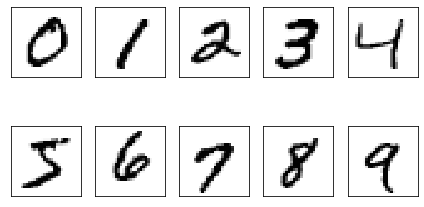

In [6]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten()
for i in range(10):
    img = train_x[train_y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()
#plt.savefig('/Users/qiqi/Desktop/MNIST/1.png')

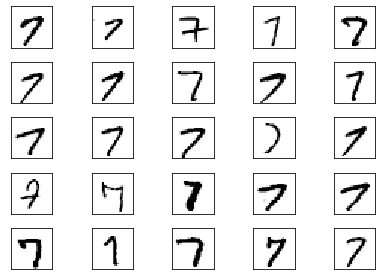

In [7]:
fig, ax = plt.subplots(
    nrows=5,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten()
for i in range(25):
    img = train_x[train_y == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()
#plt.savefig('/Users/qiqi/Desktop/MNIST/2.png')

In [13]:
# 构建模型并训练
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(train_x, train_y)

# 模型预测
print("Test set predictions:\n{}".format(reg.predict(test_x)))
print("Test set R^2:{:.2f}".format(reg.score(test_x, test_y)))

Test set predictions:
[7. 2. 1. ... 4. 5. 6.]
Test set R^2:0.95
